# PS.9

Given pairwise different 
$\{x_k\}_{k=0}^n\subset\mathbb{R}$ and values $\{y_k\}_{k=0}^n\subset\mathbb{R}$, identify a polynomial $p_n$ of degree $n$ 
such that 
\begin{equation}
p_n(x_k)=y_k ,\qquad k=0,\ldots,n.
\end{equation}

For each of the following data sets,
\begin{align*}
\{(x_i,y_i)\}_{i=0}^4 &= \{(0,1),(1,1),(2,1),(3,1),(4,1)\},\\
\{(x_i,y_i)\}_{i=0}^4 &=\{(0,0),(1,0),(2,1),(3,0),(4,0)\},\\
\{(x_i,y_i)\}_{i=0}^4 &=\{(0,1),(1,1),(2,2),(3,1),(4,1)\},\\
\{(x_i,y_i)\}_{i=0}^4 &=\{(0,1),(1,2),(2,5),(3,10),(4,17)\},
\end{align*}

determine the corresponding interpolating polynomial $p_4\in\mathbb{P}_4$. 

# PS.9

Implement the computation of the interpolating polynomial based on the following basis polynomials:

a) monomials,

\begin{equation}
p_n(x)=\sum_{k=0}^n c_k x^k,\qquad \underbrace{
\begin{pmatrix}
1 & x_0 & x_0^2 & \cdots & x_0^n\\
\vdots &&&& \vdots\\
1 & x_n & x_n^2&\cdots & x_n^n
\end{pmatrix}}_{V_n}
\begin{pmatrix}
c_0\\
\vdots \\
c_n
\end{pmatrix}
= 
\begin{pmatrix}
y_0\\
\vdots \\
y_n
\end{pmatrix}.
\end{equation}

b) Lagrange polynomials,

\begin{equation}
p_n:= \sum_{k=0}^n y_k L_k,\qquad L_k(x) = \prod_{\substack{i=0\\i\neq k}}^n \frac{x-x_i}{x_k-x_i},\quad k=0,\ldots,n.
\end{equation}

c) Newton polynomials,

\begin{equation}
p_n = \sum_{k=0}^n y[0,\ldots,k] N_k,\qquad N_k(x) = \prod_{i=0}^{k-1} (x-x_i), \qquad y[j,\ldots,j+k] = \frac{y[j+1,\ldots,j+k]-y[j,\ldots,j+k-1]}{x_{j+k}-x_j},\quad k=1,\ldots,n-j,\qquad y[k] = y_k,\quad k=0,\ldots,n.
\end{equation}

Solve now the 4 interpolation problems above with each of your implementations. 

In [63]:
using Polynomials:Polynomial,fromroots

function myInterpolationMonomial(x, y)
    n = length(x)
    V = Array{Float64}(undef, n, n)
    for i in 0:n - 1
        V[:, i+1] = x.^i
    end
    
    c = V\y    # solves Vc=y
    return Polynomial(c)  
end

function myInterpolationLagrange(x, y)
    n = length(x)
    L = Vector{Polynomial}(undef, n)
    for k in 1:n
        idx = setdiff(1:n, k)
        l = fromroots(x[idx])   # x_0,...,x_n except for x_k
        w = prod(1 ./ (x[k] .- x[idx]))
        L[k] = div(l, Polynomial([-x[k], 1])) * w
    end 
    return sum(L .* y)
end

myInterpolationLagrange (generic function with 1 method)

In [67]:
function myDividedDifferences(x,y)
    n = length(x)-1
    c = copy(y)
    for j in 2:n+1   # c[1]=y[0], ..., c[j-1]=y[0,...,j-1] , c[i] = y[i-j+1,...,i] for i=j,...,n+1
        for i in n+1:-1:j
            c[i] = (c[i]-c[i-1])/(x[i]-x[i-j+1])    
        end
    end
    return c   # returns c[1] = y[0], c[2] = y[0,1], ... c[n+1] = y[0,...,n]
end

function myInterpolationNewton(x, y)
    n = length(x)
    N = Vector{Polynomial}(undef, n)
    N[1] = Polynomial(1)  # Polynomial([1])
    c = myDividedDifferences(x, y)
    for k in 2:n
        N[k] = fromroots(x[1:k-1])
    end
    return Polynomial(sum(N .* c))
end

myInterpolationNewton (generic function with 1 method)

In [68]:
data = Vector{Matrix}(undef,4)
data[1] = [0 1.;1 1;2 1;3 1;4 1]
data[2] = [0 0.;1 0;2 1;3 0;4 0]
data[3] = [0 1.;1 1;2 2;3 1;4 1]
data[4] = [0 1.;1 2;2 5;3 10;4 17]

function xy(dataset) 
    return dataset[:,1],dataset[:,2]
end

for k in 1:4
    x,y = xy(data[k])
    println(myInterpolationMonomial(x,y))
    println(myInterpolationLagrange(x,y))
    println(myInterpolationNewton(x,y))
    println()
end

1.0
2.77556e-16 - 5.55112e-17*x - 6.93889e-17*x^2 + 6.93889e-18*x^3
1.0

-3.0*x + 4.75*x^2 - 2.0*x^3 + 0.25*x^4
0.5 + 1.75*x - 1.5*x^2 + 0.25*x^3
-3.0*x + 4.75*x^2 - 2.0*x^3 + 0.25*x^4

1.0 - 3.0*x + 4.75*x^2 - 2.0*x^3 + 0.25*x^4
0.5 + 1.75*x - 1.5*x^2 + 0.25*x^3
1.0 - 3.0*x + 4.75*x^2 - 2.0*x^3 + 0.25*x^4

1.0 + 1.0*x^2
10.0 + 3.0*x - 4.44089e-16*x^2 + 1.11022e-16*x^3
1.0 + 1.0*x^2



# PS.9

Given nonzero pairwise distinct nodes $x_0,\ldots,x_n\in\mathbb{R}$, compute the $n$-th divided differences 

$$
y[0,\ldots, k], \qquad k=0,\ldots,n,
$$
for the function $f(x)=\frac{1}{x}$. (Hence, we derive $y_j = \frac{1}{x_j}$, for $j=0,\ldots,n$).


# PS.9

Consider Runge's function

$$
f(x)=\frac{1}{1+25x^2}.
$$

a) Plot $f$ and its interpolating polynomial of minimal degree for the equidistant nodes 

$$
x_j = -1+j\frac{2}{n},\qquad j=0,\ldots,n.
$$


in the interval $[-1,1]$ for $n=10$. 

In [76]:
using Plots:scatter,plot!

function myRungePlot(x)
    f(x) = 1 / (1 + 25*x^2)
    y = f.(x)
    p = myInterpolationNewton(x, y)
    scatter(x,y,label="nodes")
    plot!(f,xlims = (-1, 1),ylims = (-1, 2),label = "Runge")
    plot!(p,xlims = (-1, 1),ylims = (-1, 2),label = "pₙ")
end

myRungePlot (generic function with 1 method)

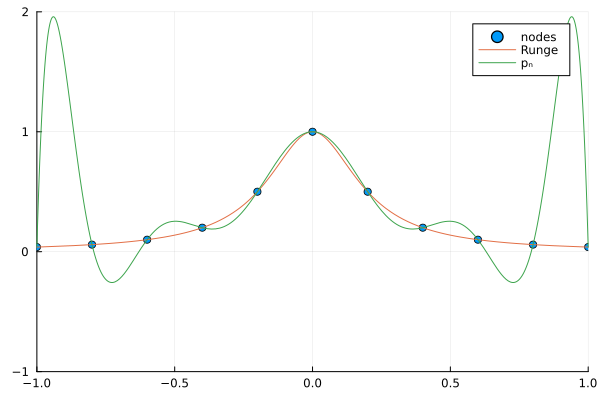

In [77]:
n = 10
x = LinRange(-1,1,n+1)
myRungePlot(x)

b) Produce the analogous plot for Chebychev nodes

$$
x_j = \cos\left(\frac{(2j+1)}{2(n+1)}\pi\right),\qquad j=0,\ldots,n.
$$

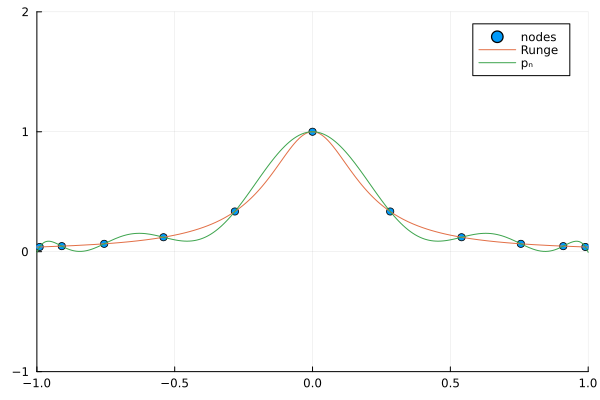

In [78]:
x = [cos((2.0*j+1)*π/(2*(n+1))) for j in 0:n]
myRungePlot(x)

c) Plot an approximation of $\Lambda_n$ for equidistant and for Chebyshev nodes with $n=2,4,\ldots,34$. The following provides the approximation:

Let us endow $\mathbb{R}^{n+1}$ with the maximum norm and fix $x_0,\ldots,x_n\in[-1,1]$. The norm of the interpolation operator 
\begin{equation*}
Y_n:\mathbb{R}^{n+1}\rightarrow\mathbb{P}_n|_{[-1,1]}
\end{equation*}
 with $Y_n y=p_n$ and $p_n(x_j)=y_j$, for $j=0,\ldots,n$, is the Lebesgue constant
 
 \begin{equation}
 \Lambda_n = \|Y_n\|_{op}=\sup_{\|y\|_\infty=1}\|Y_n y\|_{[-1,1]}=\sup_{\|y\|=1}\sup_{s\in[-1,1]}|p_n(s)|.
 \end{equation}
 
 Thus, for sufficiently dense $s_1,\ldots,s_m\in[-1,1]$, we obtain
 
 $$
 \Lambda_n\approx \sup_{\|y\|_\infty=1}\max_{i=1,\ldots,m} |p_n(s_i)|.
 $$
 
 This is the operator norm of the sampling operator

\begin{equation}
A_n : \mathbb{R}^{n+1}\rightarrow \mathbb{R}^m,\qquad y\mapsto \begin{pmatrix}
p_n(s_1)\\
\vdots\\
p_n(s_m)
\end{pmatrix},
\end{equation}

so that $\|A_n\|_{op}\approx \Lambda_n $.

In [86]:
function myVandermonde(x, m=length(x))   # allow for rectangular matrices
    return x.^(0:m-1)'
end

using LinearAlgebra:opnorm
using Plots:plot,plot!

function myLebesgue(x)
    V = myVandermonde(x)
    
    n = length(x)
    s = range(-1,1,4*n^2+1)
    W = myVandermonde(s,n)
    
    # this is equivalent to evaluating the p_n at si's
    # since we solve for c with V * c = y => c = V^-1 * y
    # y_si = p_n(si) => W * c = y_s => W * V^-1 * y = y_s
    A = W*inv(V)
    
    return opnorm(A)
end

myLebesgue (generic function with 1 method)

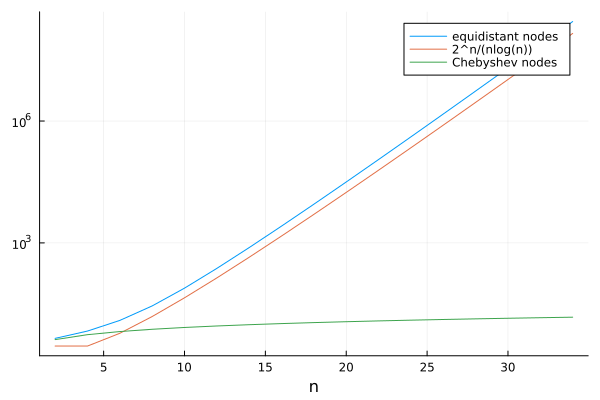

In [87]:
function myChebychevNodes(n)
    return [cos((2.0*j+1)*π/(2*(n+1))) for j in 0:n]
end

function myLebesguesPlot(M)
    f(x) = 2^x / (x * log(x))
    
    n = 2:2:M
    x = range.(-1,1,n.+1)
    z = myChebychevNodes.(n)   # myChebychevNodes needs to be defined first
    
    plot(n,myLebesgue.(x), yaxis=:log, label="equidistant nodes")
    plot!(n,f.(n), label="2^n/(nlog(n))", xlabel="n")   # f needs to be defined first
    plot!(n,myLebesgue.(z), yaxis=:log, label="Chebyshev nodes")
end

myLebesguesPlot(34)

The plot clearly shows that the conditioning of polynomial interpolation using monomials (or even all methods) gets worse with increasing number of equidistant nodes. This is known as Runge's phenomenon which is due to an increase in magnitude of the n-th derivative of a function f and a quickly increasing Lebesgue constant. 